In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GM
from scipy import stats

In [3]:
with open('SMYUI4 no selection distr.csv') as f:
    lines = f.readlines()

In [5]:
inverted_cassette_data = [int(x.strip()) for x in lines[1:]]

In [7]:
len(inverted_cassette_data)


659

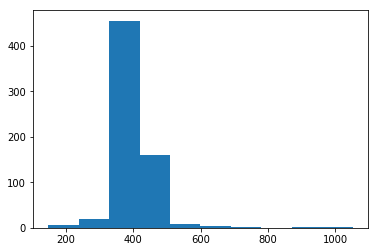

In [8]:
plt.hist(inverted_cassette_data)
plt.show()

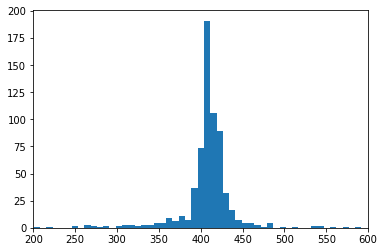

In [20]:
plt.hist(inverted_cassette_data, bins=120)
plt.xlim(200,600)
plt.show()

In [14]:
sorted([x for x in inverted_cassette_data if x < 200 or x > 600])

[148, 154, 166, 177, 184, 614, 616, 642, 653, 679, 731, 901, 1051]

In [23]:
x = np.array(inverted_cassette_data)

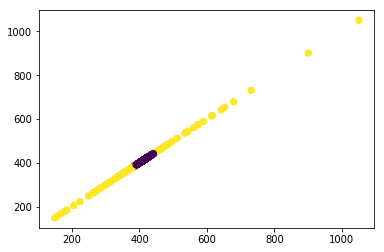

In [28]:
gmm = GM(n_components=2).fit(x.reshape(-1,1))
labels = gmm.predict(x.reshape(-1,1))
plt.scatter(x, x, c=labels, s=40, cmap='viridis')
plt.show()

In [29]:
two_cluster_gmm = gmm
two_cluster_labels = labels

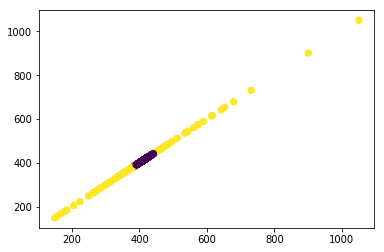

-4.6058704770836005


In [30]:
plt.scatter(x, x, c=two_cluster_labels, s=40, cmap='viridis')
plt.show()
print(two_cluster_gmm.score(x.reshape(-1,1)))

In [31]:
one_cluster_gmm = GM(n_components=1).fit(x.reshape(-1,1))
one_cluster_labels = one_cluster_gmm.predict(x.reshape(-1,1))


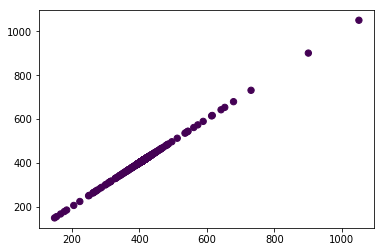

-5.451005093290691


In [32]:
plt.scatter(x, x, c=one_cluster_labels, s=40, cmap='viridis')
plt.show()
print(one_cluster_gmm.score(x.reshape(-1,1)))

In [33]:
log_prob1 = one_cluster_gmm.score(x.reshape(-1,1))
log_prob2 = two_cluster_gmm.score(x.reshape(-1,1))

lambda1 = log_prob1*len(x)
lambda2 = log_prob2*len(x)

diff = lambda1-lambda2
chisq = diff*-2

stats.chi2.pdf(chisq,3)

1.7650208049502197e-241